## Intro - Edwin

## What is HR analytics?

### Human resource analytics is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

## What is attrition in business?

### Attrition in business describes a gradual but deliberate reduction of staff numbers that occurs as employees retire or resign and are not replaced. The term is also sometimes used to describe the loss of customers or clients as they mature beyond a product or company's target market without being replaced by a younger generation.

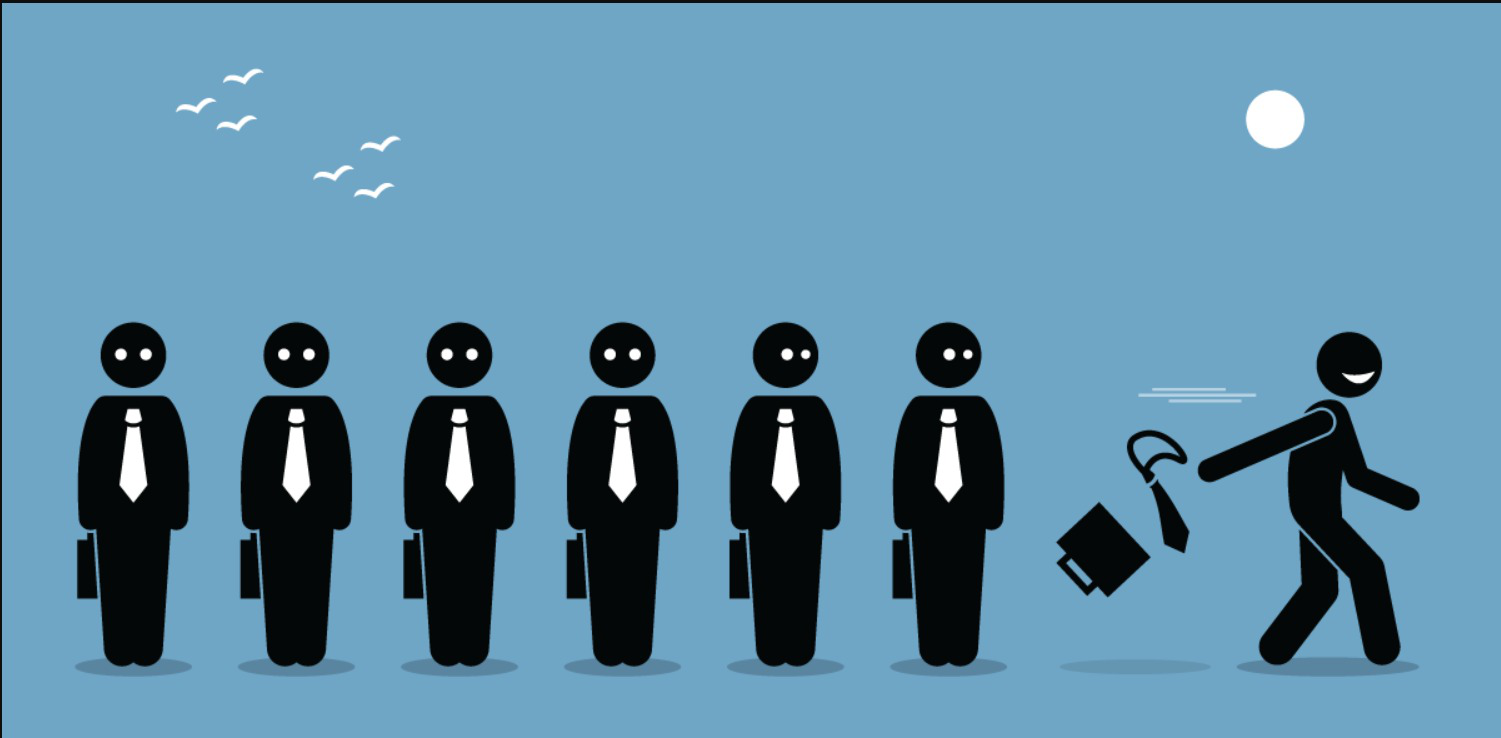

In [1]:
from PIL import Image
Image.open(r"C:\Users\wilson\Dataset\DS\Day4\Programming Res-20211109T124304Z-001\Programming Res\Attrition.jpeg")

## How attrition affect a company?

#### A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

#### Our Objectives:
#### •	Study the HR employee attrition data to identify the patterns and causes of attrition with respect to various parameters.
#### •	Identify the important parameters and generate helpful insights from them.
#### •	Build model to predict if the employee is unsatisfied and will resign or is satisfied and will stay.
#### •	Compare the parameters of a satisfied and an unsatisfied employee to come up with idea of what can be improved.
#### •	Identify future attrition early so that proper measures can be taken on time. 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_column',None)

In [3]:
data = pd.read_csv(r"C:\Users\wilson\Dataset\GroupP\IBM Data.csv", index_col='EmployeeNumber')
data.head() 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
print('The total number of rows:{} and columns:{}'.format(data.shape[0],data.shape[1]))

The total number of rows:1470 and columns:34


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

### There are 25 Numerical Variables and 9 Categorical Variables 

In [6]:
data.describe()                   

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Mean age is 36.9 years old. Minimum age is 18. Max is 60. 

In [8]:
data.describe(include='object')  # Looking into the Categorical Features

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [9]:
data[['DailyRate','HourlyRate','MonthlyRate','StandardHours']].describe()

,DailyRate,HourlyRate,MonthlyRate,StandardHours
count,1470.000000,1470.000000,1470.000000,1470.0
mean,802.485714,65.891156,14313.103401,80.0
std,403.509100,20.329428,7117.786044,0.0
min,102.000000,30.000000,2094.000000,80.0
25%,465.000000,48.000000,8047.000000,80.0
50%,802.000000,66.000000,14235.500000,80.0
75%,1157.000000,83.750000,20461.500000,80.0
max,1499.000000,100.000000,26999.000000,80.0


In [10]:
pd.DataFrame({'Count':data.isnull().sum(),'Missing%':data.isnull().mean()*100}).T # No missing values 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Missing%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
data.drop(['EmployeeCount','Over18','StandardHours'],axis=1,inplace=True) # Insignificant Features 

## Feature Transformation 

## To have a better idea of all the variables in the dataset.

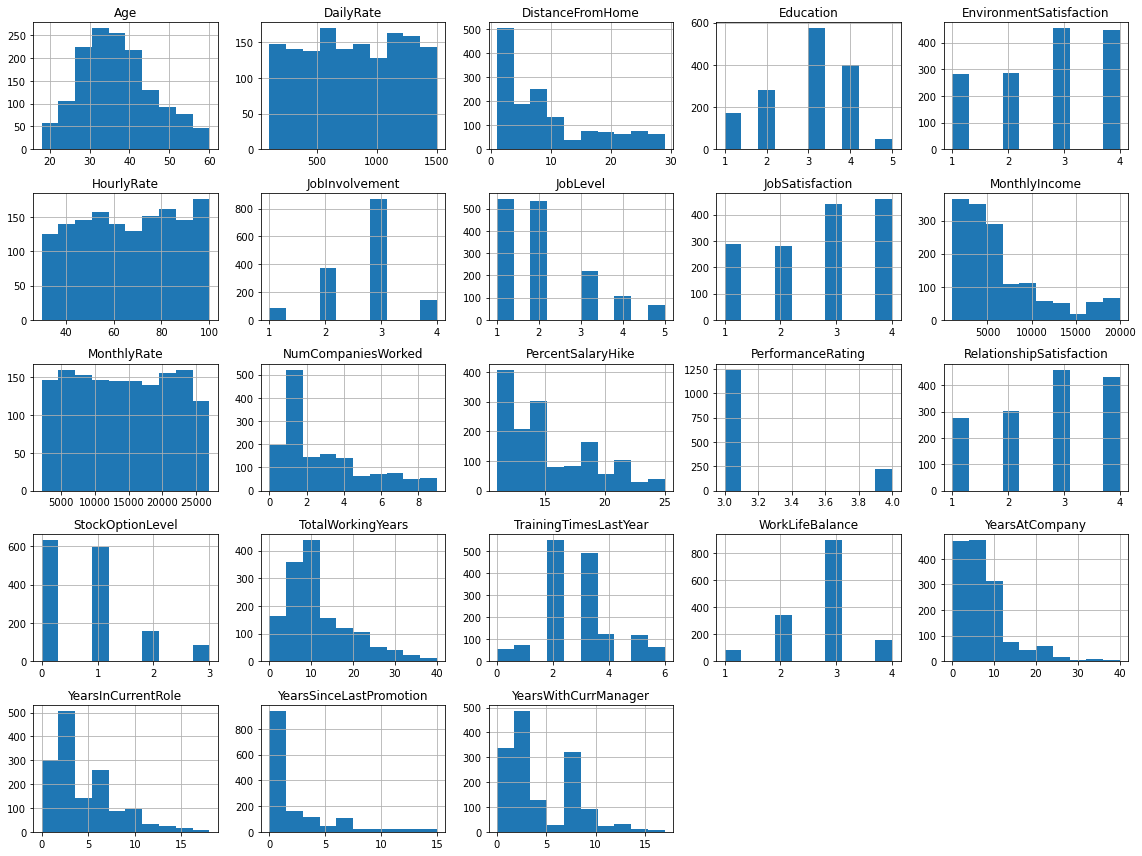

In [12]:
data.hist(figsize=(16,12))
plt.tight_layout()

# Exploratory Data Analysis 

No     1233
Yes     237
Name: Attrition, dtype: int64


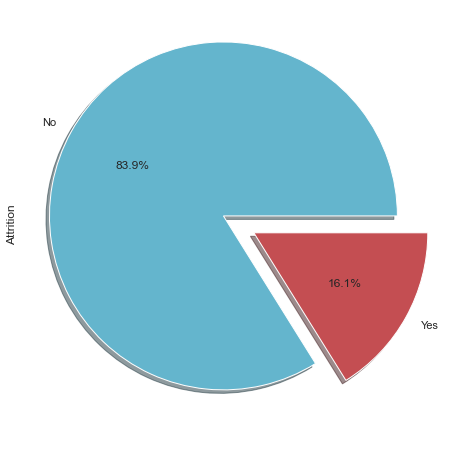

In [13]:
plt.figure(figsize=(20,8))
sns.set(style='whitegrid')
data['Attrition'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=['c','r'])
print(data['Attrition'].value_counts())

Gender     Female  Male
Attrition              
No          34.08  49.8
Yes          5.92  10.2


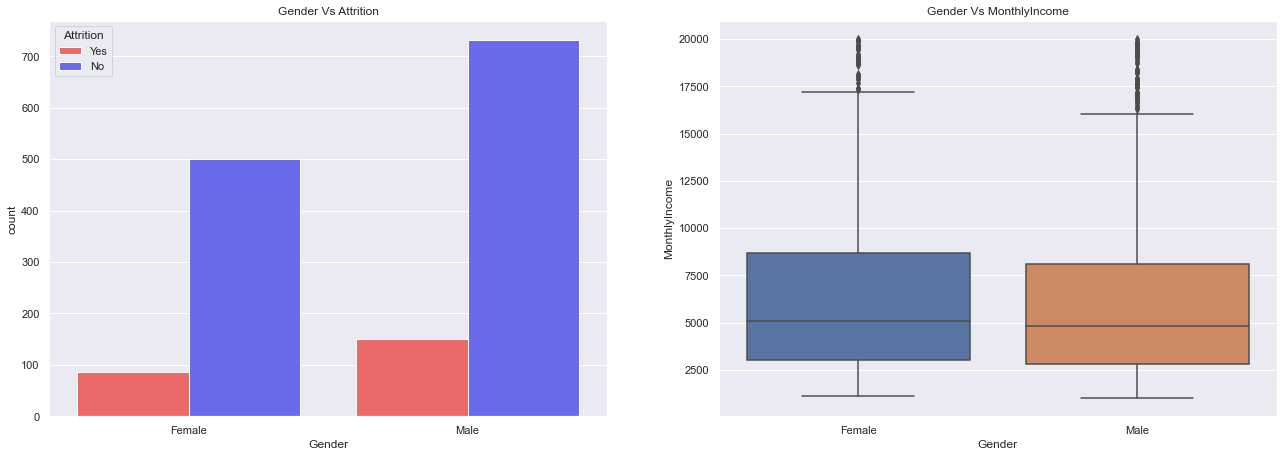

In [14]:
print(round(pd.crosstab(data['Attrition'],data['Gender'],normalize=True)*100,2))

plt.figure(figsize=(22,16))
sns.set(style="darkgrid")
plt.subplot(221)
plt.title('Gender Vs Attrition')
sns.countplot('Gender',hue='Attrition',data=data,palette='seismic_r')

plt.subplot(222)
plt.title('Gender Vs MonthlyIncome')
sns.boxplot(data['Gender'],data['MonthlyIncome'])

In [15]:
pd.pivot_table(data=data,index=['Gender'],values=['MonthlyIncome'],aggfunc='mean').style.set_properties(**{'background-color': 'black',
                                                                                                               'color': 'lawngreen',
                                                                                                               })

,MonthlyIncome
Gender,
Female,6686.566327
Male,6380.507937


# Key Inferences  
* Males have a higher rate of attrition 
* Females are earning a little higher than males 

Department  Human Resources  Research & Development  Sales
Attrition                                                 
No                       51                     828    354
Yes                      12                     133     92


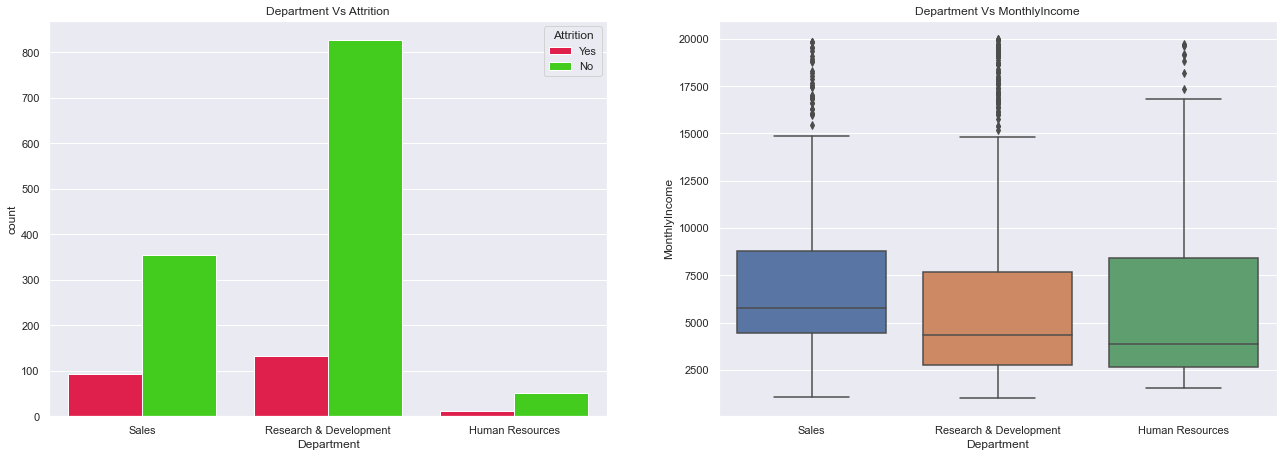

In [16]:
print (pd.crosstab(data['Attrition'],data['Department']))

plt.figure(figsize=(22,16))
sns.set(style="darkgrid")
plt.subplot(221)
plt.title('Department Vs Attrition')
sns.countplot(data['Department'],hue=data['Attrition'],palette='prism_r')

plt.subplot(222)
plt.title('Department Vs MonthlyIncome')
sns.boxplot(data['Department'],data['MonthlyIncome'])

In [17]:
#Average salary b/w different departments 
pd.pivot_table(data=data,index=['Department'],values=['MonthlyIncome'],aggfunc='mean').style.set_properties(**{'background-color': 'black',
                                                                                                               'color': 'lawngreen',
                                                                                                               })

,MonthlyIncome
Department,
Human Resources,6654.507937
Research & Development,6281.252862
Sales,6959.172646


In [18]:
pd.crosstab([data['Attrition']],data['JobRole'],normalize=True)*100

JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Attrition,,,,,,,,,
No,8.299320,2.721088,13.401361,6.598639,9.183673,5.306122,16.666667,18.299320,3.401361
Yes,0.612245,0.816327,4.217687,0.340136,0.680272,0.136054,3.197279,3.877551,2.244898


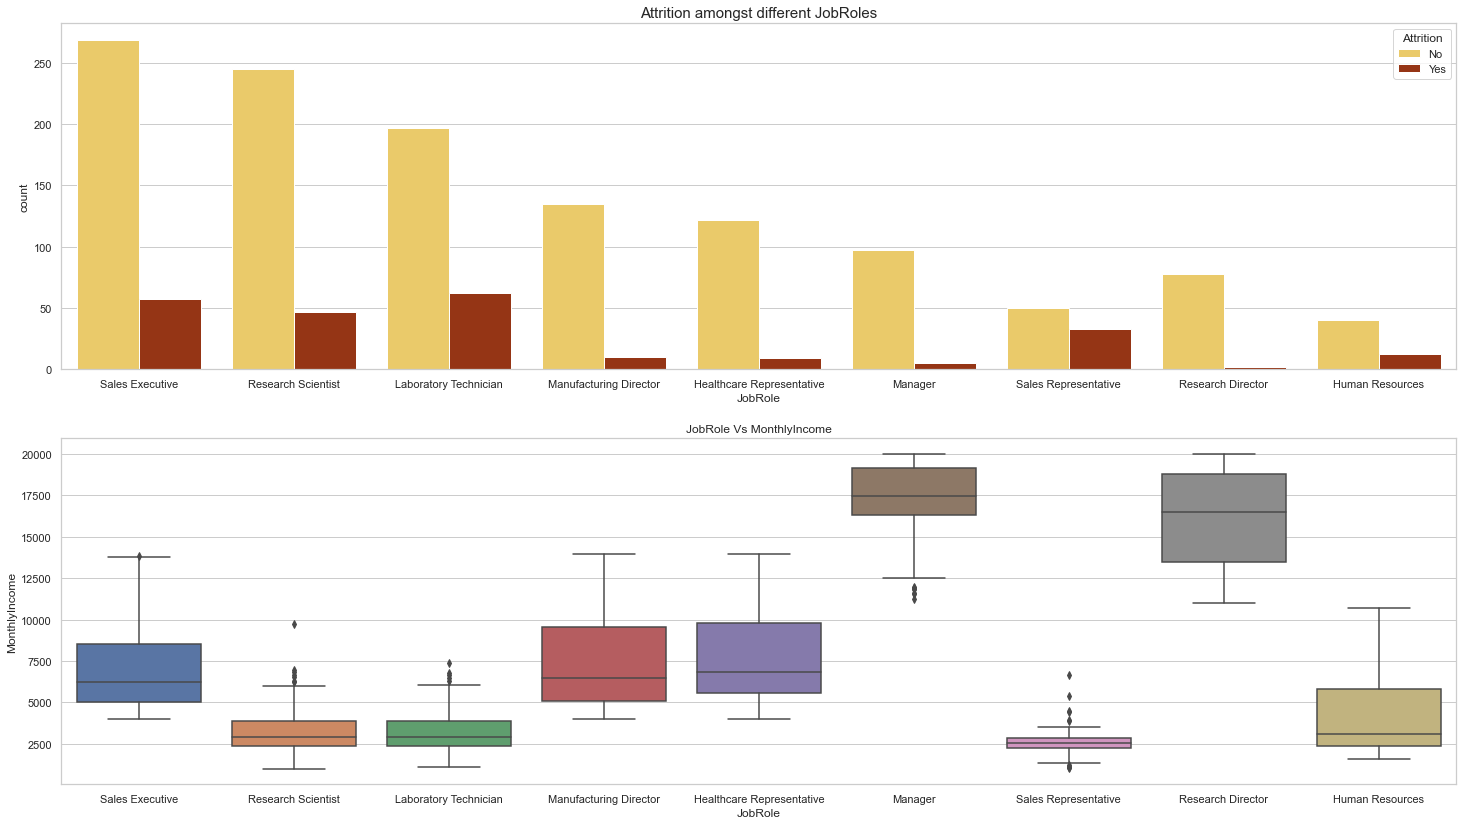

In [19]:
plt.figure(figsize=(25,14))
sns.set(style="whitegrid")


plt.subplot(211)
plt.title('JobRole Vs Attrition')
sns.countplot(data['JobRole'],palette='afmhot_r',hue=data['Attrition'].sort_values(ascending=True))
plt.title('Attrition amongst different JobRoles',size=15)


plt.subplot(212)
plt.title('JobRole Vs MonthlyIncome')
sns.boxplot(data['JobRole'],data['MonthlyIncome'])

## Why Sales Representative and Lab Technicians have a high attrition rate?

In [20]:
pd.pivot_table(data=data,index=['JobRole'],values=['MonthlyIncome'],aggfunc='mean').sort_values(by='MonthlyIncome').style.set_properties(**{'background-color': 'black',
                                                                                                               'color': 'lawngreen',
                                                                                                               })

,MonthlyIncome
JobRole,
Sales Representative,2626.000000
Laboratory Technician,3237.169884
Research Scientist,3239.972603
Human Resources,4235.750000
Sales Executive,6924.279141
Manufacturing Director,7295.137931
Healthcare Representative,7528.763359
Research Director,16033.550000
Manager,17181.676471


Attrition        No  Yes
JobInvolvement          
1                55   28
2               304   71
3               743  125
4               131   13


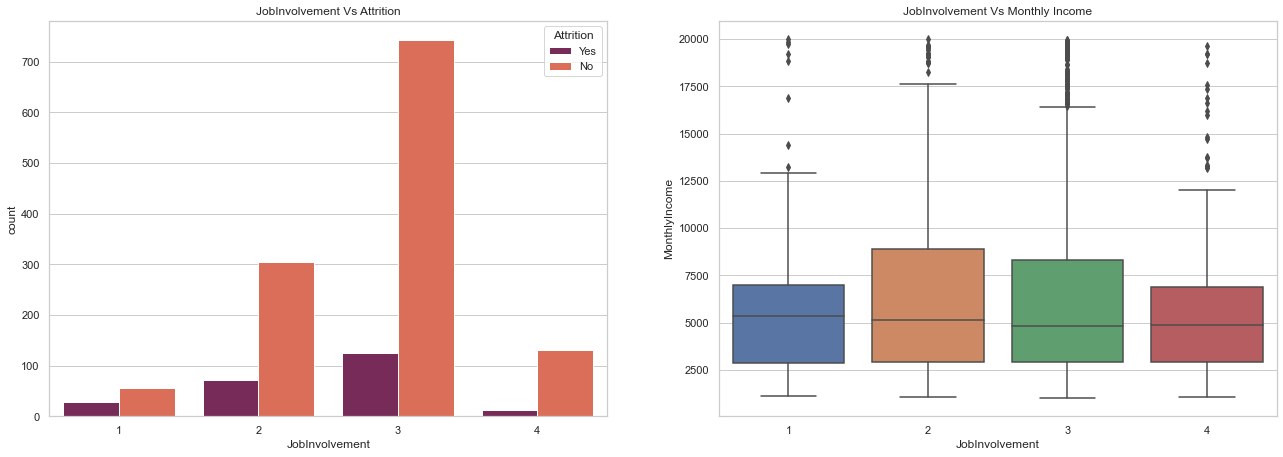

In [21]:
print(pd.crosstab(data['JobInvolvement'],data['Attrition']))

plt.figure(figsize=(22,16))
plt.subplot(221)
plt.title('JobInvolvement Vs Attrition')
sns.countplot(data['JobInvolvement'],hue=data['Attrition'],palette='rocket')

plt.subplot(222)
plt.title('JobInvolvement Vs Monthly Income')
sns.boxplot(data['JobInvolvement'],data['MonthlyIncome'])

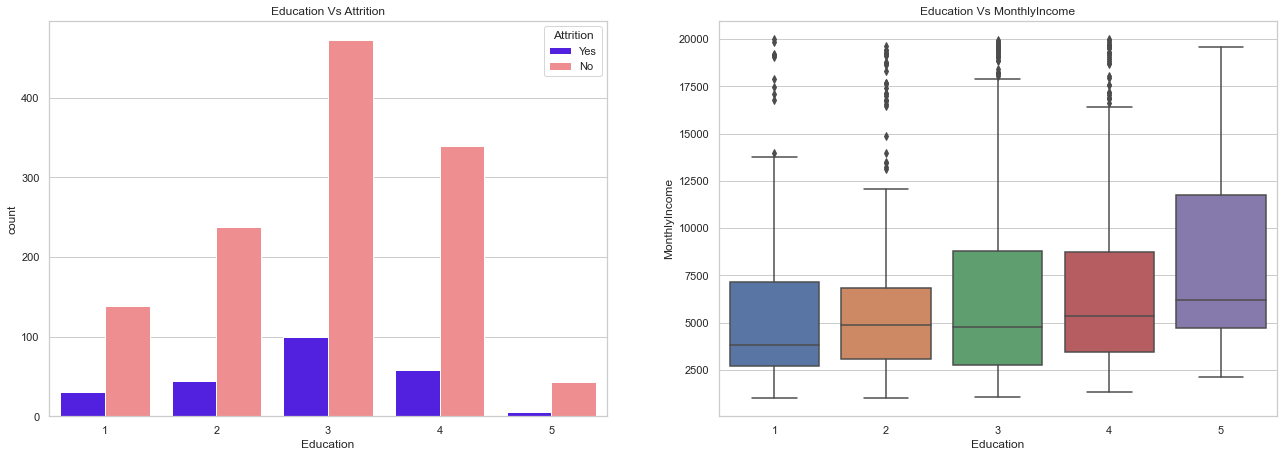

In [22]:
plt.figure(figsize=(22,16))
plt.subplot(221)
plt.title('Education Vs Attrition')
sns.countplot(data['Education'],hue=data['Attrition'],palette='gnuplot2')


plt.subplot(222)
plt.title('Education Vs MonthlyIncome')
sns.boxplot(data['Education'],data['MonthlyIncome'])

In [23]:
#Average salary b/w Education levels
pd.pivot_table(data=data,index=['Education'],values=['MonthlyIncome'],aggfunc='mean').style.set_properties(**{'background-color': 'black',
                                                                                                               'color': 'lawngreen',
                                                                                                              })  

,MonthlyIncome
Education,
1,5640.570588
2,6226.645390
3,6517.263986
4,6832.402010
5,8277.645833


## As the level of education increases , average monthly income increases

Attrition          No  Yes
EducationField            
Human Resources    20    7
Life Sciences     517   89
Marketing         124   35
Medical           401   63
Other              71   11
Technical Degree  100   32


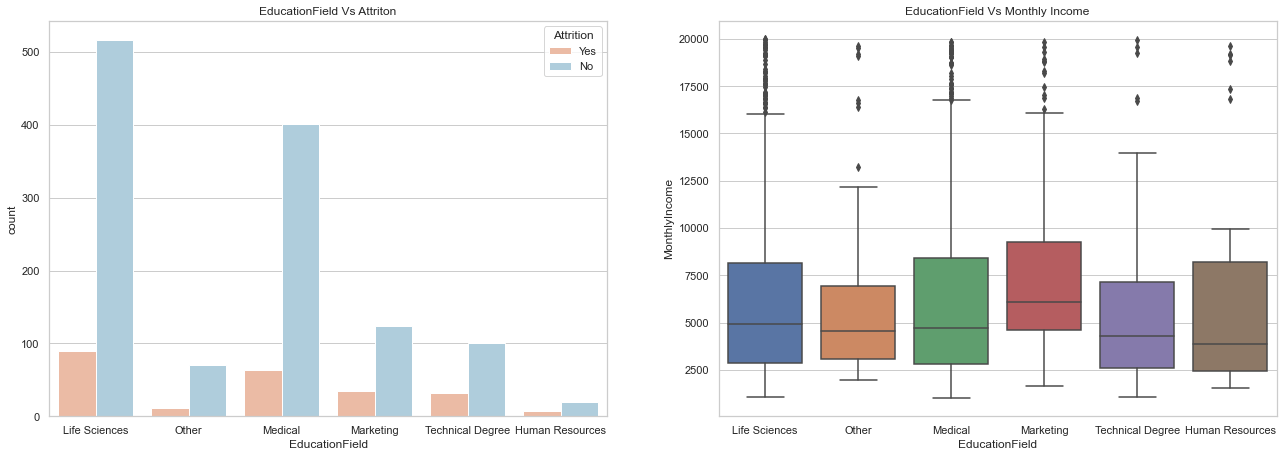

In [24]:
print(pd.crosstab(columns=data['Attrition'],index=data['EducationField']))

plt.figure(figsize=(22,16))
plt.subplot(221)
plt.title('EducationField Vs Attriton')
sns.countplot(data['EducationField'],hue=data['Attrition'],palette='RdBu')

plt.subplot(222)
plt.title('EducationField Vs Monthly Income')
sns.boxplot(data['EducationField'],data['MonthlyIncome'])

## Working with the Age Feature 

In [25]:
agebins=pd.cut(data['Age'],bins=[15,20,25,30,35,40,45,50,55,60]) #Discretisation to understand what age categories to Target

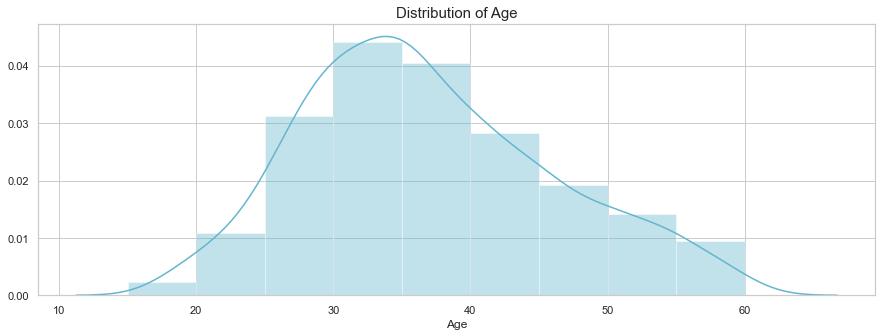

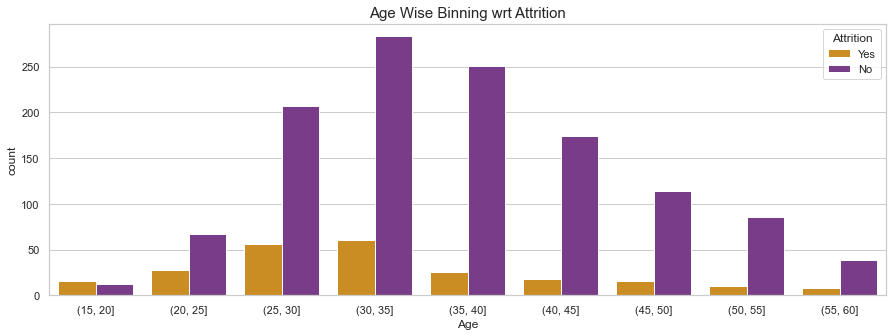

In [26]:
plt.figure(figsize=(15,5))
plt.title('Distribution of Age',size=15)
sns.distplot(data['Age'],bins=[15,20,25,30,35,40,45,50,55,60],color='c')

plt.figure(figsize=(15,5))
plt.title('Age Wise Binning wrt Attrition',size=15)
sns.countplot(agebins,hue='Attrition',data=data,palette='CMRmap_r')

EnvironmentSatisfaction    1    2    3    4
Attrition                                  
No                       212  244  391  386
Yes                       72   43   62   60


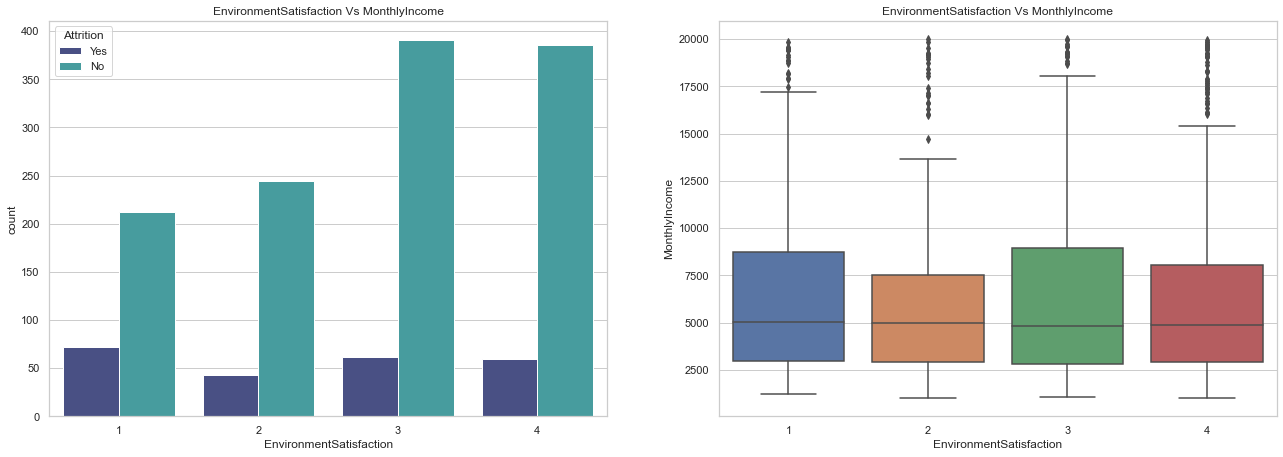

In [27]:
print(pd.crosstab(data['Attrition'],data['EnvironmentSatisfaction']))

plt.figure(figsize=(22,16))
plt.subplot(221)
plt.title('EnvironmentSatisfaction Vs MonthlyIncome')
sns.countplot(data['EnvironmentSatisfaction'],hue=data['Attrition'],palette='mako')


plt.subplot(222)
plt.title('EnvironmentSatisfaction Vs MonthlyIncome')
sns.boxplot(data['EnvironmentSatisfaction'],data['MonthlyIncome'])

In [28]:
data['EnvironmentSatisfaction'].value_counts().sort_values()

1    284
2    287
4    446
3    453
Name: EnvironmentSatisfaction, dtype: int64

## Attrition rate is high for group1 and it makes sense as this group of employees are dissatisfied with the environment conditions

MaritalStatus  Divorced  Married  Single
Attrition                               
No                  294      589     350
Yes                  33       84     120


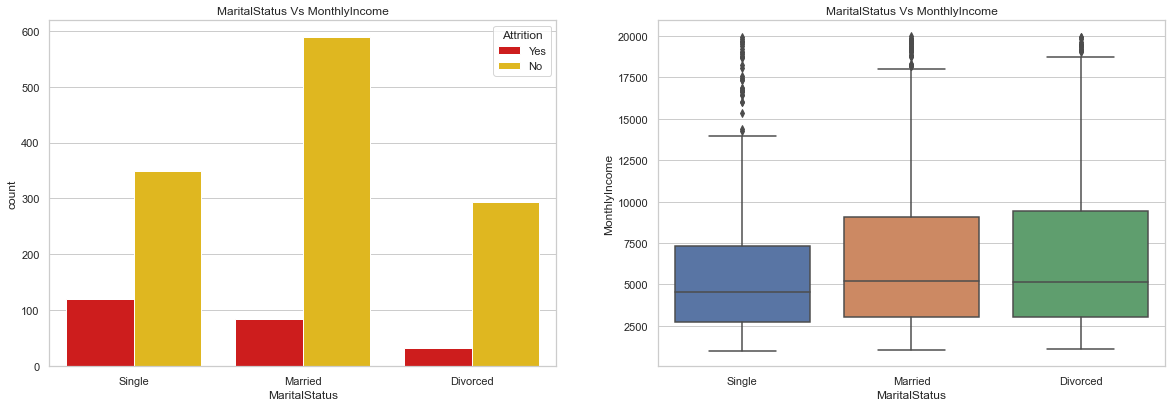

In [29]:
print(pd.crosstab(data['Attrition'],data['MaritalStatus']))

plt.figure(figsize=(20,14))
plt.subplot(221)
plt.title('MaritalStatus Vs MonthlyIncome')
sns.countplot(data['MaritalStatus'],hue=data['Attrition'],palette='hot')

plt.subplot(222)
plt.title('MaritalStatus Vs MonthlyIncome')
sns.boxplot(data['MaritalStatus'],data['MonthlyIncome'])

## Higher rate of attrition for people who are single and it makes sense as most people with less than 2 years of experience tend to leave

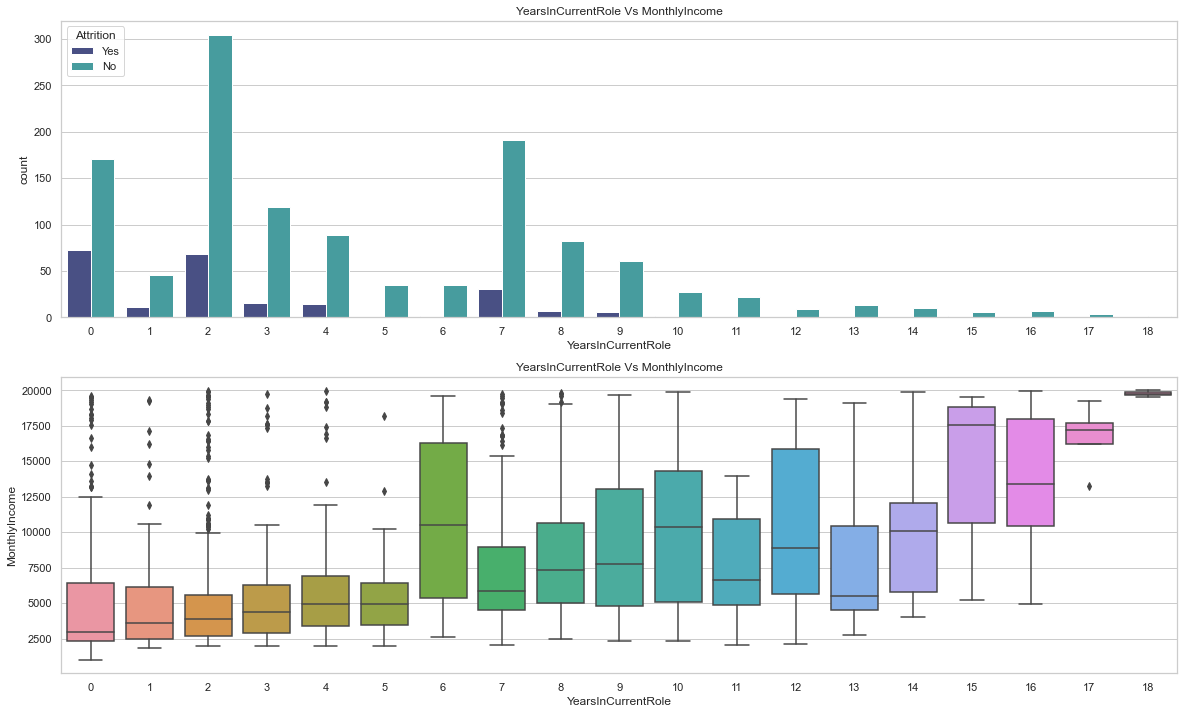

In [30]:
plt.figure(figsize=(20,12))
plt.subplot(211)
plt.title('YearsInCurrentRole Vs MonthlyIncome')
sns.countplot(data['YearsInCurrentRole'],hue=data['Attrition'],palette='mako')


plt.subplot(212)
plt.title('YearsInCurrentRole Vs MonthlyIncome')
sns.boxplot(data['YearsInCurrentRole'],data['MonthlyIncome'])

# Inferences .. (Louis)
* Employees with 7,8 and 9 YearsInCurrentRole contribute to 21.5% of the total attrition rate in the organisation 
* Employee with 6 years in Current Role is earning more than an employee carrying 14 years in Current Role
* Need to come up with better stock options for people with more than 6+ years in Current Role as attrition seems to increase gradually with a drop in monthly income 

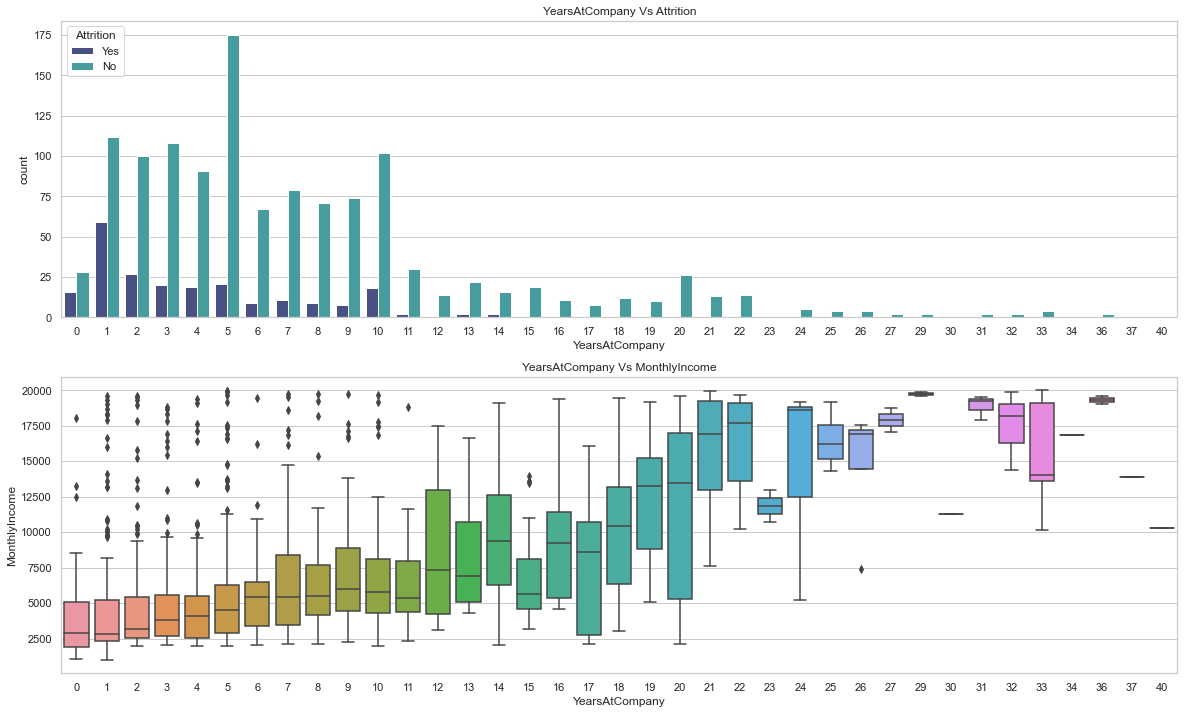

In [31]:
plt.figure(figsize=(20,12))
plt.subplot(211)
plt.title('YearsAtCompany Vs Attrition')
sns.countplot(data['YearsAtCompany'],hue=data['Attrition'],palette='mako')


plt.subplot(212)
plt.title('YearsAtCompany Vs MonthlyIncome')
sns.boxplot(data['YearsAtCompany'],data['MonthlyIncome'])

In [32]:
print('The % of Attrition for employees carrying 0-5 years at company respectively: ')
print(len(data.loc[(data['YearsAtCompany']==0) & (data['Attrition']=='Yes')])/data.shape[0]*100)
print(len(data.loc[(data['YearsAtCompany']==1) & (data['Attrition']=='Yes')])/data.shape[0]*100)
print(len(data.loc[(data['YearsAtCompany']==2) & (data['Attrition']=='Yes')])/data.shape[0]*100)
print(len(data.loc[(data['YearsAtCompany']==3) & (data['Attrition']=='Yes')])/data.shape[0]*100)
print(len(data.loc[(data['YearsAtCompany']==4) & (data['Attrition']=='Yes')])/data.shape[0]*100)
print(len(data.loc[(data['YearsAtCompany']==5) & (data['Attrition']=='Yes')])/data.shape[0]*100)

The % of Attrition for employees carrying 0-5 years at company respectively: 
1.0884353741496597
4.013605442176871
1.8367346938775513
1.3605442176870748
1.292517006802721
1.4285714285714286


# Important Questions ..
* What changes can be made to drop the % level for employees carrying 1 year of experience in the organisation ?
* Why is there a drop in income for Employees having 15 and 23 years of Experience in the company?

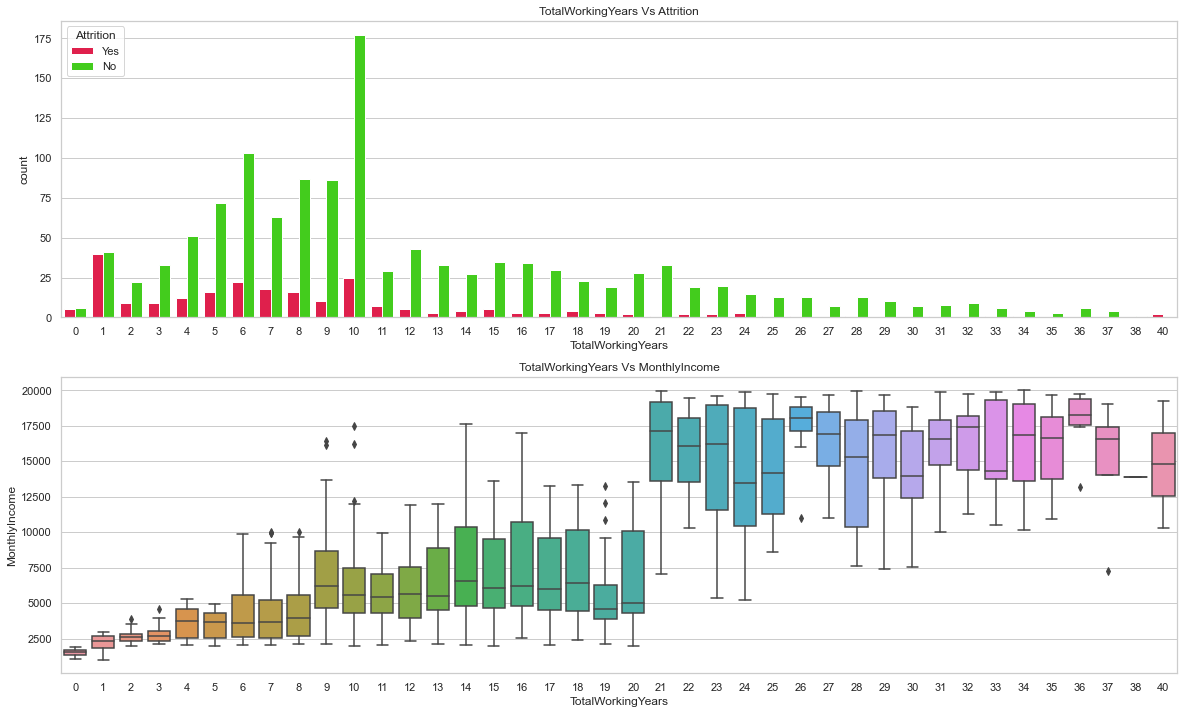

In [33]:
plt.figure(figsize=(20,12))
plt.subplot(211)
plt.title('TotalWorkingYears Vs Attrition')
sns.countplot(data['TotalWorkingYears'],hue=data['Attrition'],palette='prism_r')


plt.subplot(212)
plt.title('TotalWorkingYears Vs MonthlyIncome')
sns.boxplot(data['TotalWorkingYears'],data['MonthlyIncome'])

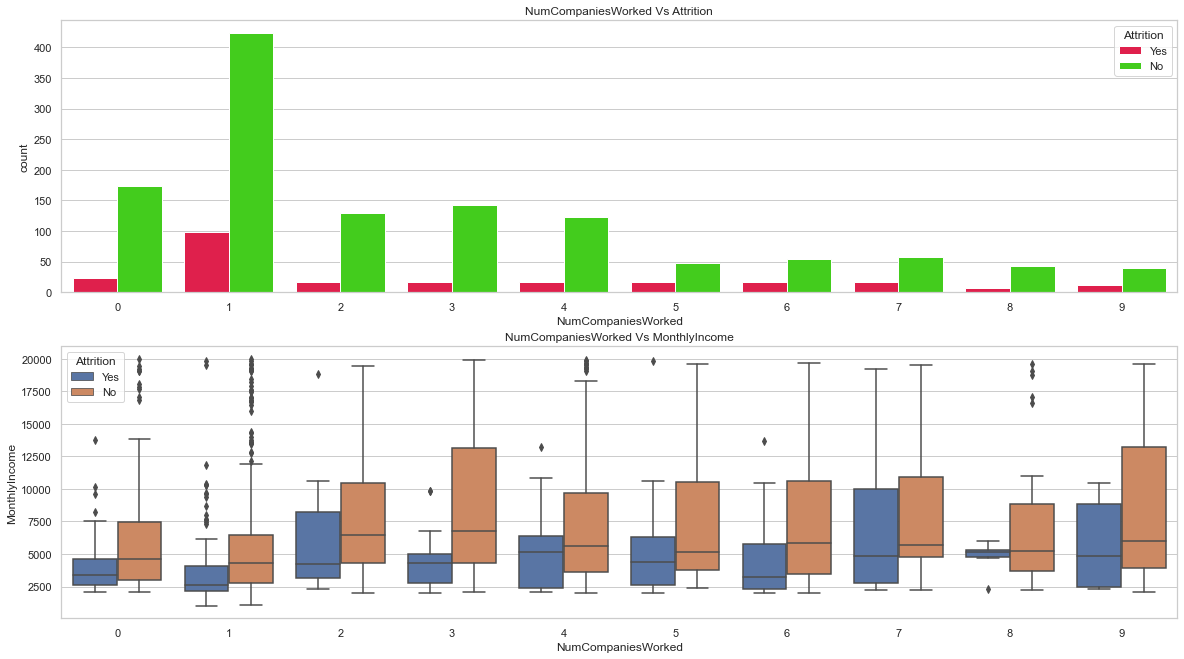

In [34]:
plt.figure(figsize=(20,11))
plt.subplot(212)
plt.title('NumCompaniesWorked Vs MonthlyIncome')
sns.boxplot(data['NumCompaniesWorked'],data['MonthlyIncome'],hue=data['Attrition'])

#plt.figure(figsize=(15,12))
plt.subplot(211)
plt.title('NumCompaniesWorked Vs Attrition')
sns.countplot(data['NumCompaniesWorked'],hue=data['Attrition'],palette='prism_r')


In [35]:
print('The % of Attrition for employees carrying 0-3 years at company respectively: ')
print(len(data.loc[(data['TotalWorkingYears']==0) & (data['Attrition']=='Yes')])/data.shape[0]*100)
print(len(data.loc[(data['TotalWorkingYears']==1) & (data['Attrition']=='Yes')])/data.shape[0]*100)
print(len(data.loc[(data['TotalWorkingYears']==2) & (data['Attrition']=='Yes')])/data.shape[0]*100)
print(len(data.loc[(data['TotalWorkingYears']==3) & (data['Attrition']=='Yes')])/data.shape[0]*100)

The % of Attrition for employees carrying 0-3 years at company respectively: 
0.3401360544217687
2.7210884353741496
0.6122448979591837
0.6122448979591837


In [36]:
pd.pivot_table(data=data,index=['TotalWorkingYears'],values=['MonthlyIncome'],aggfunc='mean').sort_values(by='MonthlyIncome').style.set_properties(**{'background-color': 'black',
                                                                                                               'color': 'lawngreen',})  

,MonthlyIncome
TotalWorkingYears,
0,1523.636364
1,2208.827160
2,2650.193548
3,2781.047619
5,3476.659091
4,3614.428571
7,4171.308642
8,4209.252427
6,4215.256000


# Key Inferences :- 
* An innovative structure needs to be implemented for employees with 1 year of experience as it is majorly contributing to the attrition % 
* Seems like the organisation has benefits in terms of income for people with 20+ years of experience 
* Why people with 6 years of experience earning the same as employees with 19 years of experience ?
* Why employees with 21 years of work experience earning as much as an employee with 40 years of experience?

# Statistical Analysis

## Questions  
* Is gender influencing attrition?
* Which job role has a higher signifance in predecting attrition?
* Is Distance from home an important attribute?

In [37]:
from scipy.stats import chi2_contingency,chisquare,f_oneway

In [38]:
cat_cols = data.describe(include = "O").columns    # Statistical analysis for categorical data types, Chisquare is performed 

In [39]:
chi_stat=[]
p_value=[]
for i in cat_cols:
    chi_res=chi2_contingency(np.array(pd.crosstab(data[i],data['Attrition'])))
    chi_stat.append(chi_res[0])
    p_value.append(chi_res[1])
chi_square=pd.DataFrame([chi_stat,p_value])
chi_square=chi_square.T
col=['Chi Square Value','P-Value']
chi_square.columns=col
chi_square.index=cat_cols

In [40]:
chi_square

,Chi Square Value,P-Value
Attrition,1462.614554,0.000000e+00
BusinessTravel,24.182414,5.608614e-06
Department,10.796007,4.525607e-03
EducationField,16.024674,6.773980e-03
Gender,1.116967,2.905724e-01
JobRole,86.190254,2.752482e-15
MaritalStatus,46.163677,9.455511e-11
OverTime,87.564294,8.158424e-21


In [41]:
chi_square[chi_square["P-Value"]<0.05]

,Chi Square Value,P-Value
Attrition,1462.614554,0.000000e+00
BusinessTravel,24.182414,5.608614e-06
Department,10.796007,4.525607e-03
EducationField,16.024674,6.773980e-03
JobRole,86.190254,2.752482e-15
MaritalStatus,46.163677,9.455511e-11
OverTime,87.564294,8.158424e-21


In [42]:
num_cols = data.describe().columns   # statistical analysis for numerical data dtypes , Therefore performing ANOVA Test

In [43]:
f_stat=[]
p_val=[]
for i in num_cols:
    atr_0=data[data['Attrition']=="No"][i]
    atr_1=data[data['Attrition']=="Yes"][i]
    a=f_oneway(atr_0,atr_1)
    f_stat.append(a[0])
    p_val.append(a[1])
anova=pd.DataFrame([f_stat,p_val])
anova=anova.T
cols=['F-STAT','P-VALUE']
anova.columns=cols
anova.index=num_cols

In [44]:
anova

,F-STAT,P-VALUE
Age,38.175887,8.356308e-10
DailyRate,4.726640,2.985816e-02
DistanceFromHome,8.968277,2.793060e-03
Education,1.446308,2.293152e-01
EnvironmentSatisfaction,15.855209,7.172339e-05
HourlyRate,0.068796,7.931348e-01
JobInvolvement,25.241985,5.677065e-07
JobLevel,43.215344,6.795385e-11
JobSatisfaction,15.890004,7.043067e-05
MonthlyIncome,38.488819,7.147364e-10


In [45]:
anova[anova["P-VALUE"]<0.05]

,F-STAT,P-VALUE
Age,38.175887,8.356308e-10
DailyRate,4.726640,2.985816e-02
DistanceFromHome,8.968277,2.793060e-03
EnvironmentSatisfaction,15.855209,7.172339e-05
JobInvolvement,25.241985,5.677065e-07
JobLevel,43.215344,6.795385e-11
JobSatisfaction,15.890004,7.043067e-05
MonthlyIncome,38.488819,7.147364e-10
StockOptionLevel,28.140501,1.301015e-07
TotalWorkingYears,44.252491,4.061878e-11


In [46]:
df=data.copy()

In [47]:
df['Attrition']=df['Attrition'].replace({'Yes':1,'No':0})
df['OverTime']=df['OverTime'].replace({'Yes':1,'No':0})# Repalacing as 0 and 1 for model understanding 

In [48]:
cat_cols=df.select_dtypes('object').columns
cat_cols

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object')

In [49]:
for col in cat_cols:
    freqs = df[col].value_counts()
    k = freqs.index[freqs>20][:-1]                 # does the work of One Hot Encoding
    for cat in k:
        name = col+'_'+cat
        df[name] = (df[col] == cat).astype(int)
    del df[col]
    print(col)

BusinessTravel
Department
EducationField
Gender
JobRole
MaritalStatus


In [50]:
df.shape

(1470, 45)

In [51]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Rarely,BusinessTravel_Travel_Frequently,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Medical,EducationField_Marketing,EducationField_Technical Degree,EducationField_Other,Gender_Male,JobRole_Sales Executive,JobRole_Research Scientist,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Healthcare Representative,JobRole_Manager,JobRole_Sales Representative,JobRole_Research Director,MaritalStatus_Married,MaritalStatus_Single
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,49,0,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
4,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1
5,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
7,27,0,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0


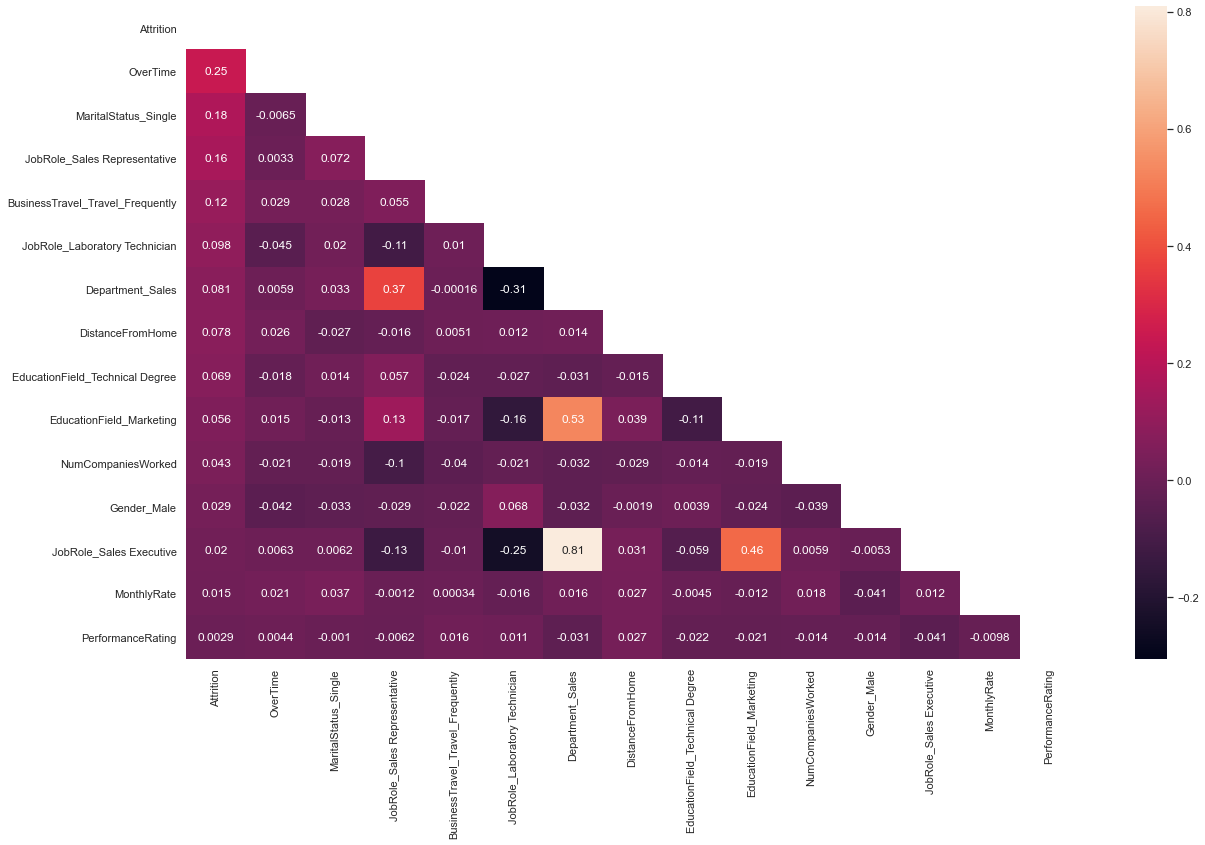

In [52]:
corr=df.corr()
cols=corr.nlargest(15,'Attrition').index
cm = np.corrcoef(df[cols].values.T)
plt.figure(figsize=(20,12))
sns.heatmap(cm,annot=True, yticklabels = cols.values, xticklabels = cols.values, mask = np.triu(cm))

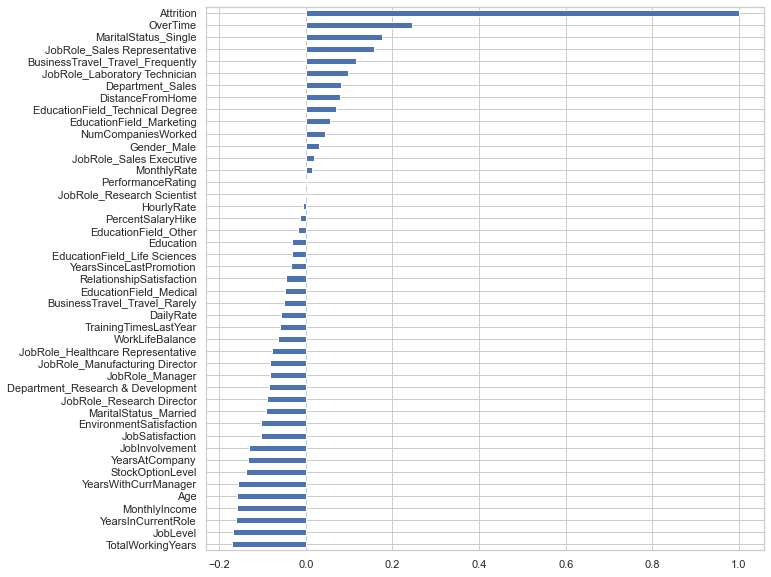

In [53]:
plt.rcParams['figure.figsize'] = (10, 10.0)
df.corr()['Attrition'].sort_values().plot(kind = "barh")

# Top 20 Features having a correlation with the Target Variable 

## Further Investigations :-  
* JobRole or Department ? (Collinearity is present for these 2 features ) - Are these 2 similar to each other?
* Dropping the Department Column would be a wiser choice as JobRole will get a clearer picture on the specific profiles to look into

In [54]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Rarely,BusinessTravel_Travel_Frequently,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Medical,EducationField_Marketing,EducationField_Technical Degree,EducationField_Other,Gender_Male,JobRole_Sales Executive,JobRole_Research Scientist,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Healthcare Representative,JobRole_Manager,JobRole_Sales Representative,JobRole_Research Director,MaritalStatus_Married,MaritalStatus_Single
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,49,0,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
4,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1
5,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
7,27,0,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0


## Applying Standard Scalar to standardize the data (Wilson)

In [55]:
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Rarely', 'BusinessTravel_Travel_Frequently',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Medical',
       'EducationField_Marketing', 'EducationField_Technical Degree',
       'EducationField_Other', 'Gender_Male', 'JobRole_Sales Executive',
       'JobRole_Research Scientist', 'JobRole_Laboratory Technician',
       'JobRole_Manufacturing Director', 'JobRole_Healthcare Repre

In [56]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
cols=list(df.columns)
cols.remove('Attrition')
for col in cols:
    df[col]=df[col].astype(float)
    df[[col]]=ss.fit_transform(df[[col]])
df['Attrition']=pd.to_numeric(df['Attrition'],downcast='integer')

In [57]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Rarely,BusinessTravel_Travel_Frequently,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Medical,EducationField_Marketing,EducationField_Technical Degree,EducationField_Other,Gender_Male,JobRole_Sales Executive,JobRole_Research Scientist,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Healthcare Representative,JobRole_Manager,JobRole_Sales Representative,JobRole_Research Director,MaritalStatus_Married,MaritalStatus_Single
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.446350,1,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,0.726020,2.125136,1.591746,-1.150554,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834,0.639841,-0.481859,-1.374051,1.515244,1.194045,-0.679141,-0.348255,-0.314093,-0.243059,-1.224745,1.873287,-0.497873,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,-0.918921,1.458650
2,1.322365,0,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,1.488876,-0.678049,-0.628241,2.129306,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541,-1.562889,2.075297,0.727775,-0.659960,1.194045,-0.679141,-0.348255,-0.314093,-0.243059,0.816497,-0.533821,2.008543,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565
4,0.008343,1,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,-1.674841,1.324226,1.591746,-0.057267,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935,0.639841,-0.481859,0.727775,-0.659960,-0.837490,-0.679141,-0.348255,-0.314093,4.114223,0.816497,-0.533821,-0.497873,2.162331,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,-0.918921,1.458650
5,-0.429664,0,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,1.243211,-0.678049,1.591746,-1.150554,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935,-1.562889,2.075297,0.727775,-0.659960,1.194045,-0.679141,-0.348255,-0.314093,-0.243059,-1.224745,-0.533821,2.008543,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565
7,-1.086676,0,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,0.325900,2.525591,-0.628241,-0.877232,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227,0.639841,-0.481859,0.727775,-0.659960,-0.837490,1.472448,-0.348255,-0.314093,-0.243059,0.816497,-0.533821,-0.497873,2.162331,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565


In [58]:
df_attrition = df

In [59]:
df_attrition.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Rarely,BusinessTravel_Travel_Frequently,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Medical,EducationField_Marketing,EducationField_Technical Degree,EducationField_Other,Gender_Male,JobRole_Sales Executive,JobRole_Research Scientist,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Healthcare Representative,JobRole_Manager,JobRole_Sales Representative,JobRole_Research Director,MaritalStatus_Married,MaritalStatus_Single
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.446350,1,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,0.726020,2.125136,1.591746,-1.150554,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834,0.639841,-0.481859,-1.374051,1.515244,1.194045,-0.679141,-0.348255,-0.314093,-0.243059,-1.224745,1.873287,-0.497873,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,-0.918921,1.458650
2,1.322365,0,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,1.488876,-0.678049,-0.628241,2.129306,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541,-1.562889,2.075297,0.727775,-0.659960,1.194045,-0.679141,-0.348255,-0.314093,-0.243059,0.816497,-0.533821,2.008543,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565
4,0.008343,1,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,-1.674841,1.324226,1.591746,-0.057267,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935,0.639841,-0.481859,0.727775,-0.659960,-0.837490,-0.679141,-0.348255,-0.314093,4.114223,0.816497,-0.533821,-0.497873,2.162331,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,-0.918921,1.458650
5,-0.429664,0,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,1.243211,-0.678049,1.591746,-1.150554,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935,-1.562889,2.075297,0.727775,-0.659960,1.194045,-0.679141,-0.348255,-0.314093,-0.243059,-1.224745,-0.533821,2.008543,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565
7,-1.086676,0,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,0.325900,2.525591,-0.628241,-0.877232,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227,0.639841,-0.481859,0.727775,-0.659960,-0.837490,1.472448,-0.348255,-0.314093,-0.243059,0.816497,-0.533821,-0.497873,2.162331,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565


## Extract the independent variable X and dependent variable Y

In [60]:
X=df.drop('Attrition',axis=1)
y=df['Attrition']

In [64]:
X.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Rarely,BusinessTravel_Travel_Frequently,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Medical,EducationField_Marketing,EducationField_Technical Degree,EducationField_Other,Gender_Male,JobRole_Sales Executive,JobRole_Research Scientist,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Healthcare Representative,JobRole_Manager,JobRole_Sales Representative,JobRole_Research Director,MaritalStatus_Married,MaritalStatus_Single
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,0.726020,2.125136,1.591746,-1.150554,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834,0.639841,-0.481859,-1.374051,1.515244,1.194045,-0.679141,-0.348255,-0.314093,-0.243059,-1.224745,1.873287,-0.497873,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,-0.918921,1.458650
2,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,1.488876,-0.678049,-0.628241,2.129306,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541,-1.562889,2.075297,0.727775,-0.659960,1.194045,-0.679141,-0.348255,-0.314093,-0.243059,0.816497,-0.533821,2.008543,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565
4,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,-1.674841,1.324226,1.591746,-0.057267,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935,0.639841,-0.481859,0.727775,-0.659960,-0.837490,-0.679141,-0.348255,-0.314093,4.114223,0.816497,-0.533821,-0.497873,2.162331,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,-0.918921,1.458650
5,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,1.243211,-0.678049,1.591746,-1.150554,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935,-1.562889,2.075297,0.727775,-0.659960,1.194045,-0.679141,-0.348255,-0.314093,-0.243059,-1.224745,-0.533821,2.008543,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565
7,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,0.325900,2.525591,-0.628241,-0.877232,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227,0.639841,-0.481859,0.727775,-0.659960,-0.837490,1.472448,-0.348255,-0.314093,-0.243059,0.816497,-0.533821,-0.497873,2.162331,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565


In [61]:
X.shape

(1470, 44)

In [65]:
y.head()

EmployeeNumber
1    1
2    0
4    1
5    0
7    0
Name: Attrition, dtype: int8

## PCA 

##### PCA is a method used to reduce number of variables in the data by extracting important one from a large pool.

In [71]:
cov_matirx=np.cov(X.T)
eig_vals,eig_vectors=np.linalg.eig(cov_matirx)

In [72]:
eig_vals  # The values are not in order , we need to sort the values 

array([5.34327505e+00, 3.49291517e+00, 2.06782381e+00, 1.98967230e+00,
       1.78655155e+00, 1.72140736e+00, 1.60792944e+00, 1.44093278e-02,
       4.49112480e-03, 3.45934489e-02, 5.01589446e-02, 1.00081640e-01,
       1.35591415e-01, 1.65559942e-01, 2.03580385e-01, 2.18599137e-01,
       2.24143947e-01, 2.53445638e-01, 2.78206993e-01, 4.96927945e-01,
       5.58648337e-01, 1.34703404e+00, 6.95820314e-01, 1.30042212e+00,
       7.56083353e-01, 7.82810022e-01, 1.22143324e+00, 1.19155984e+00,
       1.17230460e+00, 1.14383674e+00, 1.13702634e+00, 8.32379670e-01,
       8.67358791e-01, 9.00427499e-01, 9.06033485e-01, 9.30412081e-01,
       1.06840527e+00, 1.05216283e+00, 9.55583705e-01, 9.64976354e-01,
       9.85855482e-01, 1.03259586e+00, 1.02389729e+00, 1.01352051e+00])

In [80]:
eig_vectors

array([[-0.25853539, -0.06771278, -0.10846076, ..., -0.07488454,
         0.05943243, -0.01140886],
       [ 0.00253904, -0.01865383, -0.09768735, ..., -0.01697269,
         0.07623177,  0.44785983],
       [-0.0028353 ,  0.01154775, -0.03938902, ...,  0.0241606 ,
        -0.2514631 ,  0.1028392 ],
       ...,
       [-0.15039786, -0.1155593 , -0.03635305, ...,  0.01108679,
         0.13999787,  0.21197437],
       [-0.04898607, -0.00880787, -0.45592904, ...,  0.01829289,
        -0.02094478, -0.00315756],
       [ 0.0670672 ,  0.03344237,  0.56954307, ...,  0.01146152,
        -0.03803036,  0.04237881]])

In [73]:
tot=sum(eig_vals)
var_exp=[(i/tot)*100 for i in sorted(eig_vals,reverse=True)]
cum_var_exp=np.cumsum(var_exp)
print('Cumulative variance Explained:',cum_var_exp)
print('Sum of Eigen Values =',tot)

Cumulative variance Explained: [ 12.13554584  20.06858912  24.76499168  29.28389801  33.34148031
  37.25110834  40.90300745  43.96236585  46.91586011  49.68995632
  52.39620462  55.05872077  57.65658128  60.23897414  62.6655161
  65.05516854  67.40038085  69.72583712  72.02772585  74.26678229
  76.45841844  78.62872218  80.74185661  82.79962283  84.84465683
  86.81458581  88.70507087  90.48297428  92.20017657  93.78051059
  95.04930219  96.17791559  96.80977409  97.38539506  97.89446657
  98.39094482  98.85331277  99.22932939  99.53728207  99.7645856
  99.87850566  99.95707365  99.98979984 100.        ]
Sum of Eigen Values = 44.02995234853642


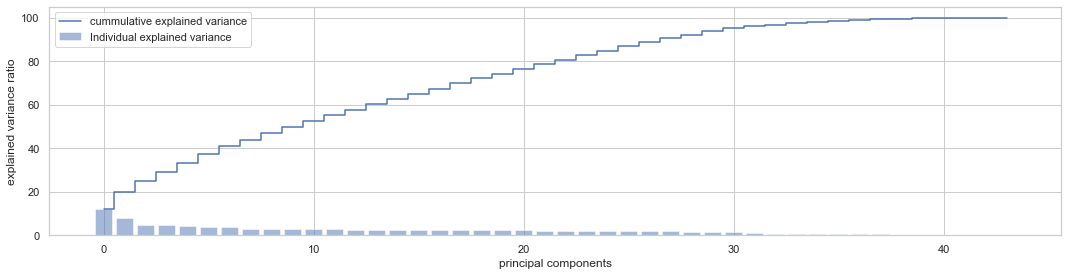

In [74]:
plt.figure(figsize=(15,4))
plt.bar(range(X.shape[1]),var_exp,alpha=0.5,align='center',label='Individual explained variance')
plt.step(range(X.shape[1]),cum_var_exp,where='mid',label='cummulative explained variance')
plt.ylabel("explained variance ratio")
plt.xlabel("principal components")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [75]:
eigen_pairs=[(np.abs(eig_vals[i]),eig_vectors[:,i]) for i in range(len(eig_vals))]

eig_val_sort=[eigen_pairs[index][0] for index in range(len(eig_vals))]
eig_vec_sort=[eigen_pairs[index][1] for index in range(len(eig_vals))]

In [76]:
eig_val_sort.sort(reverse=True)


In [78]:
P_reduce=np.array(eig_vec_sort[0:37]).T
print(P_reduce)

[[-0.25853539 -0.06771278 -0.10846076 ...  0.08460513  0.04873047
  -0.03673485]
 [ 0.00253904 -0.01865383 -0.09768735 ... -0.22647198  0.22015701
  -0.45718843]
 [-0.0028353   0.01154775 -0.03938902 ...  0.0184633   0.15868421
   0.45242509]
 ...
 [-0.15039786 -0.1155593  -0.03635305 ...  0.14154343 -0.0894138
   0.19171087]
 [-0.04898607 -0.00880787 -0.45592904 ... -0.17906098 -0.09465201
   0.03117474]
 [ 0.0670672   0.03344237  0.56954307 ...  0.01987384  0.07136703
  -0.0008545 ]]


In [79]:
projected_data=np.dot(X,P_reduce)
print(projected_data)

[[ 0.06928307  2.29839523  0.76417961 ... -0.87126344  0.4394015
  -0.11842935]
 [-0.08504891 -1.50893466  0.64962046 ... -0.22053997 -1.54645999
   0.87369439]
 [ 2.88550224 -0.97276794  0.54284564 ...  0.44085378  1.07979352
  -1.16595425]
 ...
 [ 1.03145516 -1.25907816 -1.28393761 ...  0.35133288 -0.18852046
   0.11067807]
 [-1.23046347  2.02249114  0.29387492 ...  0.17458457 -0.9294746
  -1.35930665]
 [ 1.44080196 -1.09060601 -1.21150719 ... -0.25106927  1.55777483
   0.08436602]]


In [69]:
projected_data_df=pd.DataFrame(projected_data)
projected_data_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,0.069283,2.298395,0.764180,-2.066694,-0.424175,0.023673,-2.183625,0.023697,0.001925,-0.022182,0.074763,0.059513,-0.511120,-0.171043,0.334508,0.254542,-0.636836,0.136350,0.101692,0.713959,0.012822,-1.199056,0.864607,-0.566714,0.026782,-1.803273,0.877697,-0.835484,1.213053,-0.837301,1.337882,0.675240,0.675367,-1.934677,0.871263,-0.439402,-0.118429
1,-0.085049,-1.508935,0.649620,2.743956,2.862453,1.362946,-0.844049,-0.004164,0.008841,0.108432,-0.060036,0.492411,-0.419970,0.243605,0.215928,0.518355,-0.252108,-0.155854,-0.119790,0.460444,-1.620928,-0.258742,-1.301456,0.772862,0.795258,-0.300260,0.544368,-0.649953,-0.266916,-0.616048,-0.609702,-1.240521,0.474238,0.944834,0.220540,1.546460,0.873694
2,2.885502,-0.972768,0.542846,-2.017994,-0.190858,-0.779872,0.305174,0.042024,0.004757,0.101550,-0.029143,-0.183552,-0.038280,-0.224850,0.138275,0.338055,0.209876,0.085621,0.062149,-0.380320,0.223490,0.768458,-0.659019,-1.208256,0.255364,-1.617404,-3.509558,-0.252096,-2.111807,-0.748802,0.506092,-0.353418,0.729714,-0.032670,-0.440854,-1.079794,-1.165954
3,1.236873,-1.087605,0.739829,1.195270,-0.943179,2.569712,-1.019843,-0.006617,0.010989,-0.041660,-0.039346,-0.139608,-0.132850,-0.109070,-0.324300,-0.577080,-0.294218,-0.450779,-1.162218,-0.156190,0.483575,-1.741688,-0.449395,1.443641,1.385101,1.268356,0.047666,1.015010,0.314940,-1.063890,0.017479,-0.613355,0.250538,0.095194,0.385092,-0.263972,-0.702041
4,2.087302,-1.173483,-1.587919,-0.585513,-1.077725,-0.190498,1.891743,-0.008542,0.027520,-0.142723,-0.068639,-0.044473,-0.087547,0.112467,0.215198,-0.104997,-0.029157,-0.282051,0.018558,0.505724,1.425259,1.662036,-0.656561,-1.459501,0.071653,-1.648449,0.701201,-0.078559,-0.295480,-0.028797,-0.010521,-0.622607,-0.329031,-0.419802,1.957240,1.263965,-0.411636


## Splitting the data set to train and test 

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3, stratify=y)

In [71]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X.shape)
print(y.shape)

(1029, 44)
(441, 44)
(1029,)
(441,)
(1470, 44)
(1470,)


### PCA model
##### PCA is a method used to reduce number of variables in the data by extracting important one from a large pool. 

Confusion matrix - Train : 
 [[841  22]
 [ 79  87]]
Overall Accuracy - Train : 0.901846452866861
AUC - Train: 0.8851722067877537
**************************************************
Confusion matrix - Test : 
 [[353  17]
 [ 46  25]]
Overall Accuracy - Test : 0.8571428571428571
AUC - Test: 0.80228397411496
**************************************************
Cross Val Scores
[0.8693831  0.80704672 0.82500231]
Bias Error    : 16.61892882441714
Variance Error: 2.6199835877838975


Text(0, 0.5, 'TPR')

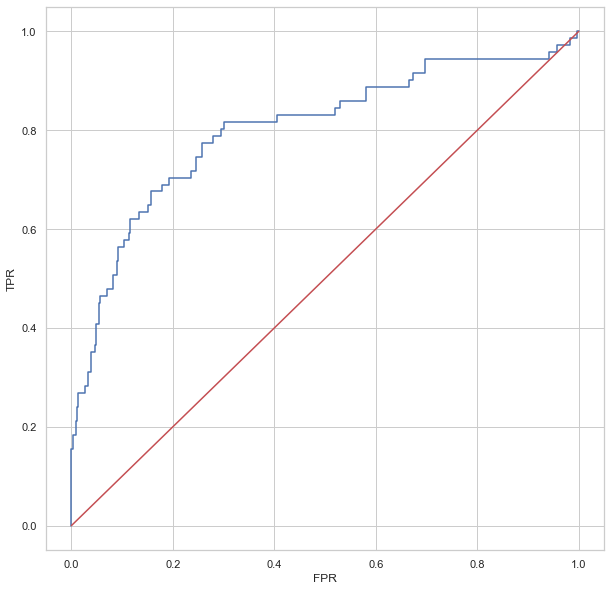

In [72]:
# Applying PCA function on training 
# and testing set of X component 
from sklearn.decomposition import PCA


pca = PCA(n_components = 37)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)                          # LOGISITC REGRESSION WITH PCA

from sklearn.linear_model import LogisticRegression
algo= LogisticRegression(random_state = 3)

algo.fit(X_train_pca , y_train)
y_train_pred = algo.predict(X_train_pca)
y_train_prob = algo.predict_proba(X_train_pca)

#overall acc of train model
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_score

print('Confusion matrix - Train :', '\n',confusion_matrix(y_train , y_train_pred))
print('Overall Accuracy - Train :',accuracy_score(y_train , y_train_pred))
print('AUC - Train:', roc_auc_score(y_train , y_train_prob[:,1]))

y_test_pred = algo.predict(X_test_pca)
y_test_prob = algo.predict_proba(X_test_pca)[:,1]
print('*'*50)
print('Confusion matrix - Test :', '\n',confusion_matrix(y_test , y_test_pred))
print('Overall Accuracy - Test :',accuracy_score(y_test , y_test_pred))
print('AUC - Test:', roc_auc_score(y_test , y_test_prob))

print('*'*50)
scores=cross_val_score(algo,X,y,cv=3,scoring='roc_auc')
print('Cross Val Scores')
print(scores)
print('Bias Error    :',100-scores.mean()*100)
print('Variance Error:',scores.std()*100)



fpr , tpr , threshold = roc_curve(y_test , y_test_prob)
plt.plot(fpr , tpr)
plt.plot(fpr , fpr , 'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')


##  Building Machine Learning Models

In [101]:
from sklearn.metrics import confusion_matrix , accuracy_score , roc_auc_score , roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,KFold
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
# Importing all the predictive models.


lr = LogisticRegression(fit_intercept=True)
knn = KNeighborsClassifier()


# Declaring various classification models for the predictive model building.

### Creating a dummy classifier to know the base models predictions

In [102]:
clf=DummyClassifier(strategy='stratified')
clf.fit(X_train,y_train)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [103]:
clf.predict(X_test)

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,

In [104]:
print('Base Score on Train Data Set: ',clf.score(X_train,y_train)) 
print('Base Score on Test Data Set : ',clf.score(X_test,y_test)) 

Base Score on Train Data Set:  0.7298347910592808
Base Score on Test Data Set :  0.7437641723356009


* now we know that our Supervised Learning Models have to perform better than the above mentioned score

In [105]:
from sklearn.metrics import classification_report

In [106]:
def model_eval(algo , X_train , y_train , X_test , y_test):

    algo.fit(X_train , y_train)
    y_pred = algo.predict(X_train)

    y_train_pred = algo.predict(X_train)               # Finding the positives and negatives 
    y_train_prob = algo.predict_proba(X_train)[:,1]    #we are intersted only in the second column


    #overall acc of train model
    print('Confusion matrix - Train :', '\n',confusion_matrix(y_train , y_train_pred))
    print('Overall Accuracy - Train :',accuracy_score(y_train , y_train_pred))
    print('AUC - Train:', roc_auc_score(y_train , y_train_prob))

    y_test_pred = algo.predict(X_test)
    y_test_prob = algo.predict_proba(X_test)[:,1]
    print('*'*50)
    print('Confusion matrix - Test :', '\n',confusion_matrix(y_test , y_test_pred))
    print('Overall Accuracy - Test :',accuracy_score(y_test , y_test_pred))
    print('AUC - Test:', roc_auc_score(y_test , y_test_prob))
    
    print('*'*50)
    scores=cross_val_score(algo,X,y,cv=3,scoring='roc_auc')
    print('Cross Val Scores')
    print(scores)
    print('Bias Error    :',100-scores.mean()*100)
    print('Variance Error:',scores.std()*100)
    
    print('\n')
    print('Classification Report:\n', classification_report(y_test, y_test_pred))
    
    

    fpr , tpr , threshold = roc_curve(y_test , y_test_prob)
    plt.plot(fpr , tpr)
    plt.plot(fpr , fpr , 'r-')
    plt.xlabel('FPR')
    plt.ylabel('TPR')

## *Linear Regression 

In [107]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LinearR = LinearRegression()
# fitting the training data
LinearR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [108]:
y_prediction =  LR.predict(X_test)
y_prediction

array([ 0.27207373,  0.04047703,  0.08862476,  0.0333011 ,  0.64266288,
        0.06807458,  0.59487792,  0.14344752,  0.46307388,  0.25711482,
        0.23402433,  0.23234908,  0.08708783,  0.23653239,  0.12843935,
       -0.07511525, -0.12725958,  0.04299378, -0.11049831,  0.5697545 ,
       -0.23679716,  0.30399846,  0.30268464,  0.39699875, -0.00212392,
        0.35730493,  0.49221092,  0.13798266,  0.10571031, -0.10941264,
        0.04222681,  0.07859598,  0.24606159,  0.12812764,  0.01298737,
        0.2638999 ,  0.31623902,  0.32505935,  0.19539681,  0.40885665,
        0.16825018,  0.05930166,  0.13695241,  0.11467078,  0.04548916,
        0.35951628, -0.08792894,  0.09273697,  0.18341051,  0.07824604,
        0.00726104,  0.09055505,  0.47523024,  0.21697234,  0.07563411,
        0.19130213,  0.03713086,  0.49959605,  0.52792928,  0.12610716,
        0.20483639,  0.31195585, -0.03686447, -0.05308555,  0.12187716,
        0.02386096, -0.0348239 ,  0.45632213,  0.31035153, -0.02

In [109]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 score is',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is 0.15978326824648703
mean_sqrd_error is== 0.11349434414243441
root_mean_squared error of is== 0.33688921642349196


## R2 indicates the model fit. The dataset does not fit with Linear Regression as the model accuracy is 15%. This indicates we should look at other models.

## *Logistic Regression (Vinoth)

Confusion matrix - Train : 
 [[841  22]
 [ 79  87]]
Overall Accuracy - Train : 0.901846452866861
AUC - Train: 0.8884041379888035
**************************************************
Confusion matrix - Test : 
 [[352  18]
 [ 48  23]]
Overall Accuracy - Test : 0.8503401360544217
AUC - Test: 0.8042634183479255
**************************************************
Cross Val Scores
[0.8693831  0.80704672 0.82500231]
Bias Error    : 16.61892882441714
Variance Error: 2.6199835877838975


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       370
           1       0.56      0.32      0.41        71

    accuracy                           0.85       441
   macro avg       0.72      0.64      0.66       441
weighted avg       0.83      0.85      0.83       441



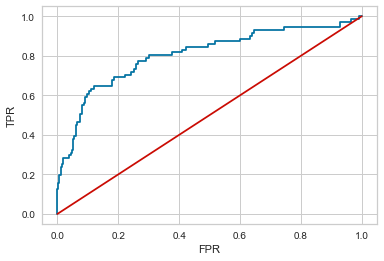

In [110]:
model_eval(lr , X_train , y_train , X_test , y_test)

## *KNN

Confusion matrix - Train : 
 [[854   9]
 [114  52]]
Overall Accuracy - Train : 0.880466472303207
AUC - Train: 0.9206117633919223
**************************************************
Confusion matrix - Test : 
 [[362   8]
 [ 61  10]]
Overall Accuracy - Test : 0.8435374149659864
AUC - Test: 0.6517129805862201
**************************************************
Cross Val Scores
[0.75401152 0.68311312 0.67549047]
Bias Error    : 29.57949634009877
Variance Error: 3.5355720536331776


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.91       370
           1       0.56      0.14      0.22        71

    accuracy                           0.84       441
   macro avg       0.71      0.56      0.57       441
weighted avg       0.81      0.84      0.80       441



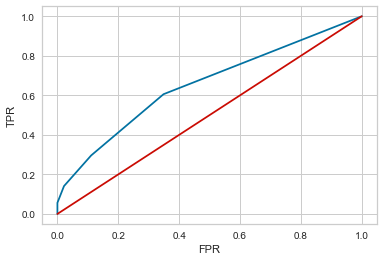

In [111]:
model_eval(knn , X_train , y_train , X_test , y_test)

## ** Using Pycaret to assess which model is best  

In [112]:
data = df_attrition
data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Sales Executive,JobRole_Research Scientist,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Healthcare Representative,JobRole_Manager,JobRole_Sales Representative,JobRole_Research Director,MaritalStatus_Married,MaritalStatus_Single
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,0.446350,1,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,...,1.873287,-0.497873,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,-0.918921,1.458650
2,1.322365,0,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,...,-0.533821,2.008543,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565
4,0.008343,1,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,...,-0.533821,-0.497873,2.162331,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,-0.918921,1.458650
5,-0.429664,0,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,...,-0.533821,2.008543,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565
7,-1.086676,0,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,...,-0.533821,-0.497873,2.162331,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565


In [113]:
from pycaret.classification import *
clf=setup(data,target='Attrition')

,Description,Value
0,session_id,2536
1,Target,Attrition
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(1470, 45)"
5,Missing Values,False
6,Numeric Features,22
7,Categorical Features,22
8,Ordinal Features,False
9,High Cardinality Features,False


In [86]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8794,0.8229,0.3767,0.7021,0.4855,0.4254,0.4537,0.9210
lda,Linear Discriminant Analysis,0.8755,0.8159,0.3700,0.6696,0.4717,0.4094,0.4343,0.0070
gbc,Gradient Boosting Classifier,0.8726,0.8019,0.3012,0.7074,0.4141,0.3575,0.4016,0.0940
xgboost,Extreme Gradient Boosting,0.8716,0.7892,0.3200,0.6857,0.4284,0.3683,0.4056,0.1310
ada,Ada Boost Classifier,0.8696,0.7910,0.3325,0.6851,0.4391,0.3752,0.4101,0.0530
ridge,Ridge Classifier,0.8677,0.0000,0.1629,0.9100,0.2648,0.2323,0.3367,0.0060
lightgbm,Light Gradient Boosting Machine,0.8638,0.7873,0.2575,0.6631,0.3646,0.3057,0.3514,0.2830
et,Extra Trees Classifier,0.8580,0.8014,0.1379,0.7417,0.2272,0.1879,0.2713,0.0900
rf,Random Forest Classifier,0.8570,0.7910,0.1129,0.7500,0.1910,0.1591,0.2483,0.1010
svm,SVM - Linear Kernel,0.8492,0.0000,0.3325,0.5544,0.3992,0.3202,0.3409,0.0070


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4364, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##### So we conclude that the best model we are getting is Logistic Regression model and now we can fit this model with the required predictor variables and predict the attrition of an employee. This is a versatile model and can be implemented in any organization to analyse their previous employee base and check the attrition.

In [87]:
from pycaret.classification import *
clf=setup(data,target='Attrition',normalize=True,
    normalize_method='zscore',
    transformation=True,
    transformation_method='yeo-johnson')

,Description,Value
0,session_id,5226
1,Target,Attrition
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(1470, 45)"
5,Missing Values,False
6,Numeric Features,22
7,Categorical Features,22
8,Ordinal Features,False
9,High Cardinality Features,False


In [114]:
compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8775,0.8137,0.3801,0.7034,0.4912,0.4298,0.4568,0.0080
lr,Logistic Regression,0.8794,0.8136,0.3801,0.7264,0.4887,0.4307,0.4632,0.0150
rf,Random Forest Classifier,0.8590,0.7990,0.1279,0.8333,0.2181,0.1870,0.2875,0.1120
lightgbm,Light Gradient Boosting Machine,0.8696,0.7880,0.2643,0.7449,0.3874,0.3341,0.3912,0.1300
xgboost,Extreme Gradient Boosting,0.8619,0.7878,0.2710,0.6369,0.3770,0.3160,0.3528,0.1060
gbc,Gradient Boosting Classifier,0.8687,0.7811,0.2827,0.7108,0.4010,0.3439,0.3912,0.0900
et,Extra Trees Classifier,0.8599,0.7808,0.1710,0.7017,0.2739,0.2307,0.3014,0.0970
ada,Ada Boost Classifier,0.8638,0.7798,0.3324,0.6410,0.4296,0.3630,0.3911,0.0480
nb,Naive Bayes,0.6634,0.7444,0.7011,0.2823,0.4001,0.2249,0.2692,0.0060
knn,K Neighbors Classifier,0.8424,0.6492,0.0978,0.4700,0.1573,0.1158,0.1594,0.0190


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [115]:
lr.classes_ = np.array([-1, 1])

In [116]:
tuned_lr= tune_model(lr,optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8544,0.6875,0.1250,0.6667,0.2105,0.1698,0.2445
1,0.8738,0.7385,0.3125,0.7143,0.4348,0.3758,0.4167
2,0.9126,0.9368,0.5000,0.8889,0.6400,0.5947,0.6266
3,0.8544,0.8391,0.2500,0.5714,0.3478,0.2797,0.3102
4,0.8738,0.8333,0.1875,1.0000,0.3158,0.2805,0.4039
5,0.9029,0.7770,0.4118,1.0000,0.5833,0.5389,0.6073
6,0.8835,0.7045,0.2941,1.0000,0.4545,0.4103,0.5080
7,0.8835,0.7524,0.3529,0.8571,0.5000,0.4467,0.5034
8,0.9020,0.9491,0.4375,0.8750,0.5833,0.5347,0.5761
9,0.8922,0.9004,0.5000,0.7273,0.5926,0.5329,0.5453


In [117]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [118]:
final_lr_model=finalize_model(tuned_lr)

In [119]:
data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Sales Executive,JobRole_Research Scientist,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Healthcare Representative,JobRole_Manager,JobRole_Sales Representative,JobRole_Research Director,MaritalStatus_Married,MaritalStatus_Single
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,0.446350,1,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,...,1.873287,-0.497873,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,-0.918921,1.458650
2,1.322365,0,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,...,-0.533821,2.008543,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565
4,0.008343,1,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,...,-0.533821,-0.497873,2.162331,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,-0.918921,1.458650
5,-0.429664,0,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,...,-0.533821,2.008543,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565
7,-1.086676,0,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,...,-0.533821,-0.497873,2.162331,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565


In [120]:
print(final_lr_model)

LogisticRegression(C=0.16, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [121]:
predictions=predict_model(final_lr_model,data=data)
predictions.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Healthcare Representative,JobRole_Manager,JobRole_Sales Representative,JobRole_Research Director,MaritalStatus_Married,MaritalStatus_Single,Label,Score
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,0.446350,1,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,...,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,-0.918921,1.458650,0,0.7110
2,1.322365,0,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,...,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565,0,0.9543
4,0.008343,1,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,...,2.162331,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,-0.918921,1.458650,0,0.7409
5,-0.429664,0,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,...,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565,0,0.8760
7,-1.086676,0,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,...,2.162331,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565,0,0.5581


In [122]:
columns=[column for column in predictions.columns if (column!='Attrition') & (column!='Label') &(column!='Score')]
columns= columns + ['Attrition','Label','Score']
predictions=predictions[columns]

In [123]:
predictions['Attrition'].unique()

array([1, 0], dtype=int8)

In [124]:
predictions['Label'].unique()

array([0, 1])

In [125]:
predictions.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Healthcare Representative,JobRole_Manager,JobRole_Sales Representative,JobRole_Research Director,MaritalStatus_Married,MaritalStatus_Single,Attrition,Label,Score
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,...,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,-0.918921,1.458650,1,0,0.7110
2,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,...,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565,0,0,0.9543
4,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,...,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,-0.918921,1.458650,1,0,0.7409
5,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,...,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565,0,0,0.8760
7,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,...,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565,0,0,0.5581


In [131]:
#sorted_score = predictions[sorted(predictions.Score)]

predictions.sort_values(by='Score', ascending=False)


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Healthcare Representative,JobRole_Manager,JobRole_Sales Representative,JobRole_Research Director,MaritalStatus_Married,MaritalStatus_Single,Attrition,Label,Score
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1424,1.979376,0.826816,-1.010909,1.061787,-0.660531,0.743454,1.785511,1.749610,1.153254,1.748501,...,-0.330808,-0.312785,-0.273059,-0.244625,4.168333,-0.918921,-0.685565,0,0,0.9985
417,0.227347,0.816900,-1.010909,0.085049,0.254625,-0.880361,1.785511,0.845911,1.153254,0.660823,...,-0.330808,3.197088,-0.273059,-0.244625,-0.239904,-0.918921,-0.685565,0,0,0.9968
558,0.336849,1.476341,-0.887515,1.061787,0.254625,0.645041,0.379672,2.653309,0.246200,2.451593,...,-0.330808,-0.312785,3.662208,-0.244625,-0.239904,1.088232,-0.685565,0,0,0.9966
1201,1.760373,1.042498,-0.270544,-0.891688,1.169781,-0.781948,0.379672,2.653309,0.246200,2.571644,...,-0.330808,-0.312785,3.662208,-0.244625,-0.239904,-0.918921,-0.685565,0,0,0.9965
1250,1.869874,-0.291259,-0.764121,0.085049,1.169781,0.940280,0.379672,1.749610,1.153254,2.395924,...,-0.330808,-0.312785,-0.273059,-0.244625,4.168333,1.088232,-0.685565,0,0,0.9964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,-0.977174,-1.734097,1.827158,0.085049,0.254625,-0.781948,-1.026167,-0.961486,0.246200,-0.950827,...,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,-0.918921,1.458650,1,1,0.5076
235,-1.962690,-0.497025,-1.010909,-1.868426,0.254625,1.678377,-2.432006,-0.961486,-1.567907,-0.887721,...,-0.330808,-0.312785,-0.273059,4.087890,-0.239904,-0.918921,1.458650,1,0,0.5031
1714,-1.415181,-1.394460,1.580370,-1.868426,1.169781,-0.388296,-2.432006,-0.961486,0.246200,-1.051330,...,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565,1,1,0.5025


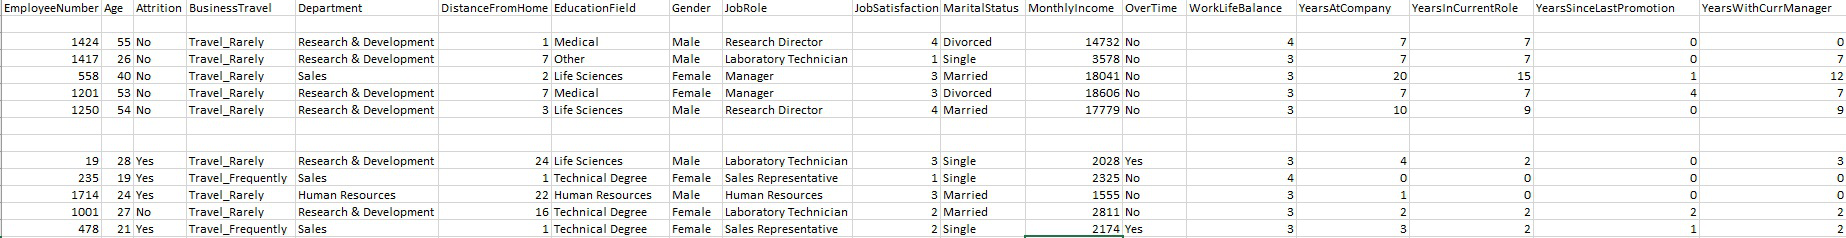

In [137]:
from PIL import Image
Image.open(r'C:\Users\wooo_\OneDrive\Desktop\SUTD Notes\Data Science Modelling\Group Project\After Prediction Scores.jpg')

## As compared to the prediction scores, above is the dataset and the respective employees as shown in the prediction scores table.

## Some of the proven employee retention statergies.

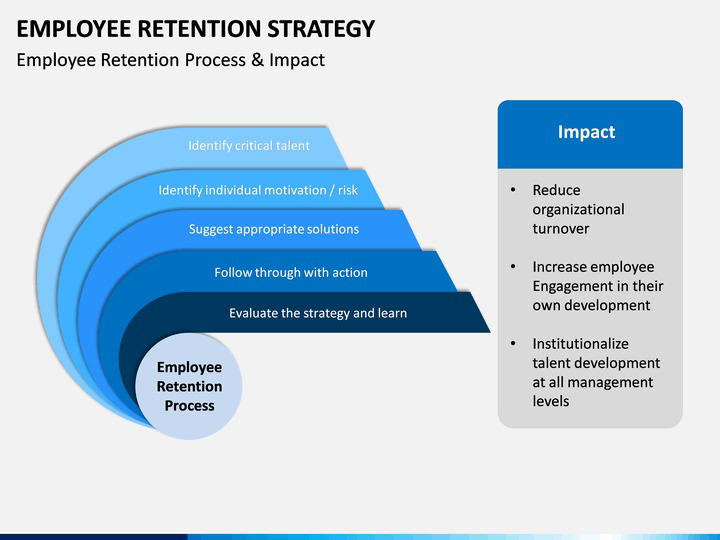

In [135]:
from PIL import Image
Image.open(r"C:\Users\wilson\Dataset\DS\Day4\Programming Res-20211109T124304Z-001\Programming Res\Employee Retention Strategy.jpeg")

## Risk Category, Indicators and Strategic Retention Plan
## Risk Category
## As the company generates more data on its employees (on New Joiners and recent Leavers) the algorithm can be re-trained using the additional data and theoritically generate more accurate predictions to identify high-risk employees of leaving based on the probabilistic label assigned to each feature variable (i.e. employee) by the algorithm.

## Employees can be assigning a "Risk Category" based on the predicted probability of leaving the company:

## Low-risk for employees with probability > 0.8
## Medium-risk for employees with probability between 0.6 and 0.8
## High-risk for employees with probability < 0.6



## Strategic Retention Plan
## The stronger indicators of people leaving include:

## Monthly Income: people on higher wages are less likely to leave the company. Hence, efforts should be made to gather information on industry benchmarks in the current local market to determine if the company is providing competitive wages.
## Over Time: people who work overtime are more likely to leave the company. Hence efforts must be taken to appropriately scope projects upfront with adequate support and manpower so as to reduce the use of overtime.

## Age: Employees in relatively young age bracket 25–35 are more likely to leave. Hence, efforts should be made to clearly articulate the long-term vision of the company and young employees fit in that vision, as well as provide incentives in the form of clear paths to promotion for instance.

## DistanceFromHome: Employees who live further from home are more likely to leave the company. Hence, efforts should be made to provide support in the form of company transportation for clusters of employees leaving the same area, or in the form of Transportation Allowance. Initial screening of employees based on their home location is probably not recommended as it would be regarded as a form of discrimination as long as employees make it to work on time every day.

## TotalWorkingYears: The more experienced employees are less likely to leave. Employees who have between 5–8 years of experience should be identified as potentially having a higher-risk of leaving.

## YearsAtCompany: Loyal companies are less likely to leave. Employees who hit their two-year anniversary should be identified as potentially having a higher-risk of leaving.

## YearsWithCurrManager: A large number of leavers leave 6 months after their Current Managers. By using Line Manager details for each employee, one can determine which Manager have experienced the largest numbers of employees resigning over the past year.

## WorkLifeBalance: Employees who had "Bad" Work-Life Balance are more likely to leave the company. Hence, efforts should be made to improve the work life balance of the employees such as limiting the hours of overtime, flexible working hours, option of working from home, and so on.

## Several metrics can be used here to determine whether action should be taken with a Line Manager:

## Number of years the Line Manager has been in a particular position: this may indicate that the employees may need management training or be assigned a mentor (ideally an Executive) in the organisation

## Patterns in the employees who have resigned: this may indicate recurring patterns in employees leaving in which case action may be taken accordingly.

## A strategic "Retention Plan" should be drawn for each Risk Category group. In addition to the suggested steps for each feature listed above, face-to-face meetings between a HR representative and employees can be initiated for medium- and high-risk employees to discuss work conditions. Also, a meeting with those employee's Line Manager would allow to discuss the work environment within the team and whether steps can be taken to improve it.